In [1]:
# Install RDKit.
# %%capture
!pip install rdkit-pypi

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import warnings

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem, PandasTools, MACCSkeys
from rdkit import DataStructs
from rdkit.DataStructs.cDataStructs import TanimotoSimilarity

from collections import Counter
pd.set_option('display.max_rows', None)

warnings.filterwarnings("ignore")

In [3]:
df = pd.read_excel('alcohols.xlsx')
df.head()

,Name,Smiles
0,2-phenoxyethanol,OCCOC1=CC=CC=C1
1,2-bromoethanol,BrCCO
2,2-fluoroethanol,FCCO
3,methanol,CO
4,benzylalcohol,OCC1=CC=CC=C1


In [4]:
# Creating molecular object from Smiles

PandasTools.AddMoleculeColumnToFrame(df,'Smiles','mol')

In [5]:
df.head()

,Name,Smiles,mol
0,2-phenoxyethanol,OCCOC1=CC=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7e3c818f7ca0>
1,2-bromoethanol,BrCCO,<rdkit.Chem.rdchem.Mol object at 0x7e3c818f7d10>
2,2-fluoroethanol,FCCO,<rdkit.Chem.rdchem.Mol object at 0x7e3c818f7e60>
3,methanol,CO,<rdkit.Chem.rdchem.Mol object at 0x7e3c818f7b50>
4,benzylalcohol,OCC1=CC=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7e3c818f7ed0>


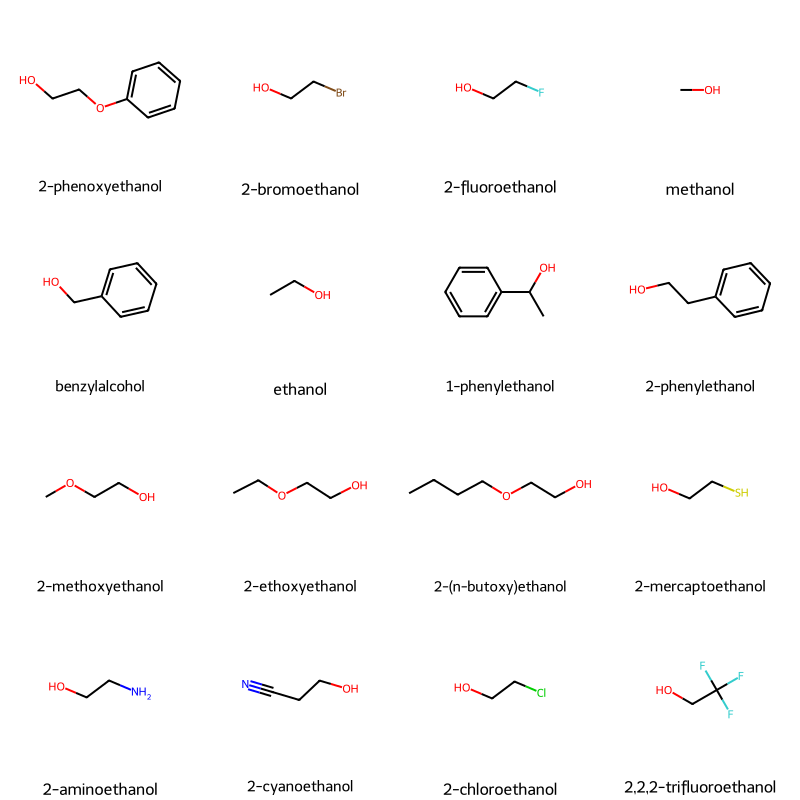

In [6]:
Draw.MolsToGridImage(df['mol'][:16],molsPerRow=4,subImgSize=(200,200),legends=[x for x in df['Name'][:16]])

## **Tanimoto Similarity**

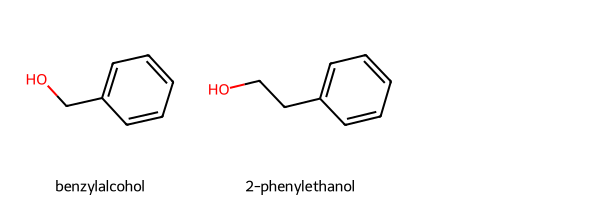

In [7]:
Draw.MolsToGridImage(df['mol'][4:8:3],molsPerRow=3,subImgSize=(200,200),legends=[x for x in df['Name'][4:8:3]])

In [8]:
mf_ba = AllChem.GetMorganFingerprintAsBitVect(df['mol'][4], radius=2, nBits = 2048)
mf_pe = AllChem.GetMorganFingerprintAsBitVect(df['mol'][7], radius=2, nBits = 2048)

In [9]:
# print the position and number of On bits
print(f'The bits are on at position {list(mf_ba.GetOnBits())}')
print(Counter(np.array(mf_ba)))

The bits are on at position [58, 80, 222, 389, 807, 837, 1066, 1073, 1088, 1199, 1380, 1750, 1754, 1873]
Counter({0: 2034, 1: 14})


In [10]:
# print the position and number of On bits
print(f'The bits are on at position {list(mf_pe.GetOnBits())}')
print(Counter(np.array(mf_pe)))

The bits are on at position [80, 222, 389, 473, 574, 807, 1045, 1066, 1088, 1199, 1243, 1380, 1750, 1754, 1873, 1891]
Counter({0: 2032, 1: 16})


In [11]:
set(mf_ba.GetOnBits()) & set(mf_pe.GetOnBits())

{80, 222, 389, 807, 1066, 1088, 1199, 1380, 1750, 1754, 1873}

In [12]:
len(set(mf_ba.GetOnBits()) & set(mf_pe.GetOnBits()))

11

In [13]:
print(set(mf_ba.GetOnBits()) | set(mf_pe.GetOnBits()))
len(set(mf_ba.GetOnBits()) | set(mf_pe.GetOnBits()))

{1088, 389, 837, 80, 1873, 1045, 1750, 473, 1754, 1243, 222, 1891, 1380, 807, 1066, 1199, 1073, 58, 574}


19

In [14]:
TanimotoSimilarity(mf_ba, mf_pe)

0.5789473684210527

In [15]:
mf_bv = [AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits = 2048) for mol in df['mol']]


In [21]:
Tanimoto_similarity = [TanimotoSimilarity(mf_bv[4], x) for x in mf_bv]


In [22]:
# put the Tanimoto coefficient values into data frame.
df["ts_index"] = Tanimoto_similarity

,Name,Smiles,mol,ts_index
0,2-phenoxyethanol,OCCOC1=CC=CC=C1,,0.375000
1,2-bromoethanol,BrCCO,,0.157895
2,2-fluoroethanol,FCCO,,0.157895
3,methanol,CO,,0.062500
4,benzylalcohol,OCC1=CC=CC=C1,,1.000000
5,ethanol,CCO,,0.176471
6,1-phenylethanol,OC(C)C1=CC=CC=C1,,0.304348
7,2-phenylethanol,OCCC1=CC=CC=C1,,0.578947
8,2-methoxyethanol,OCCOC,,0.130435
9,2-ethoxyethanol,OCCOCC,,0.120000

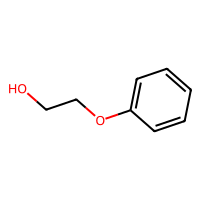
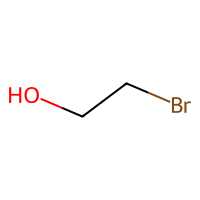
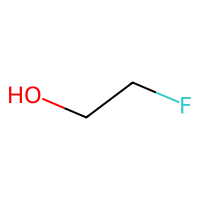
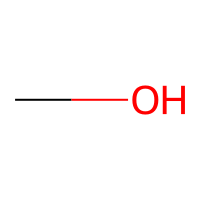
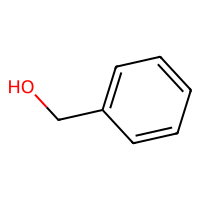
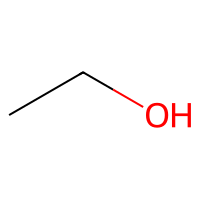
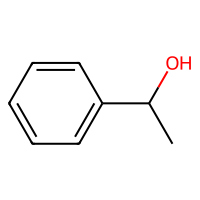
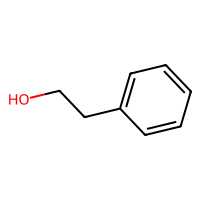
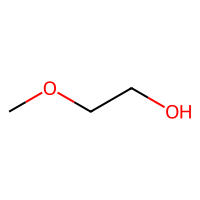
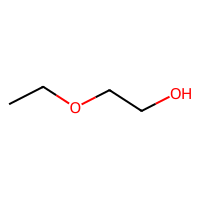
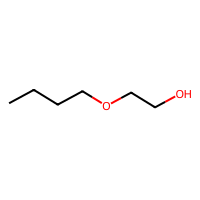
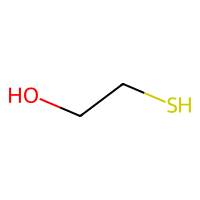
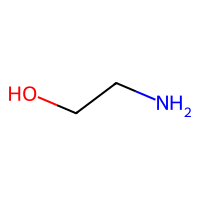
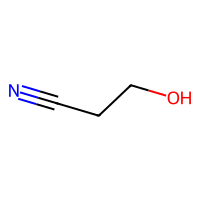
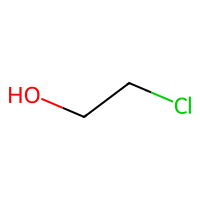
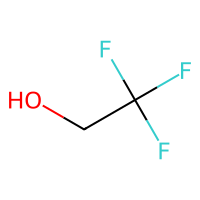
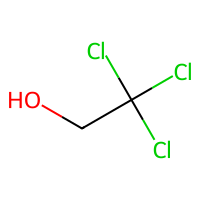
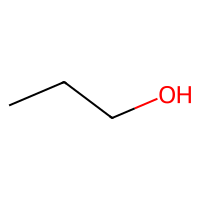
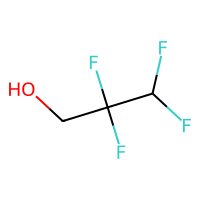
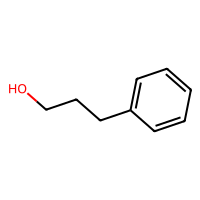
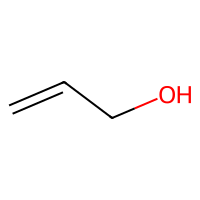
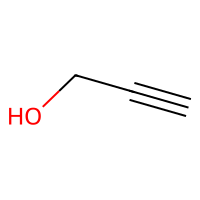
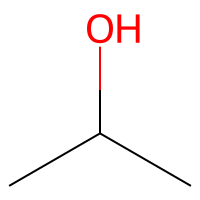
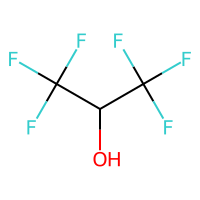
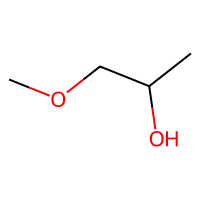
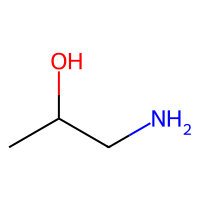
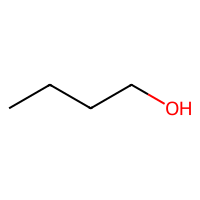
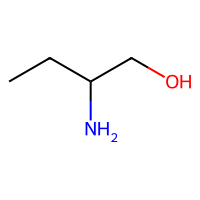
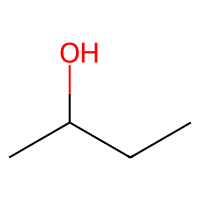
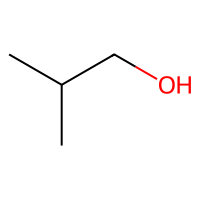
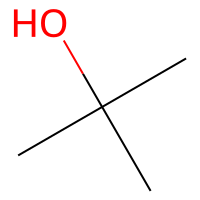
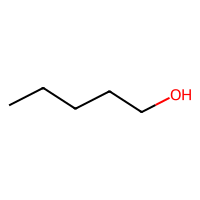
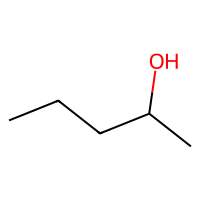
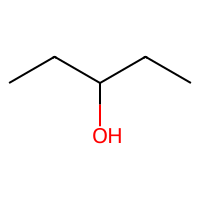
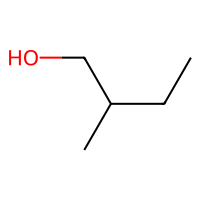
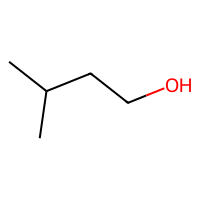
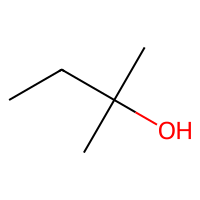
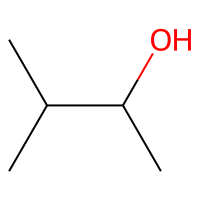
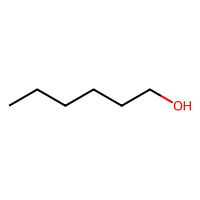
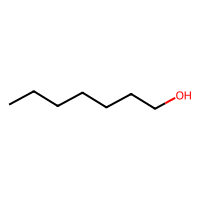
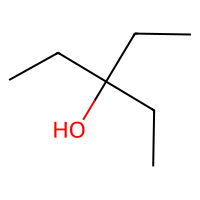
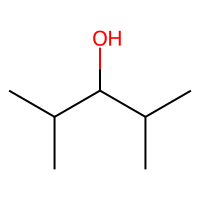
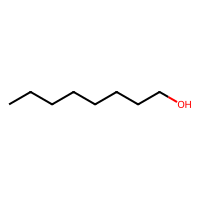
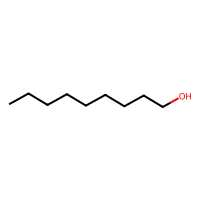
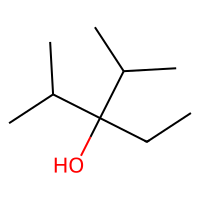
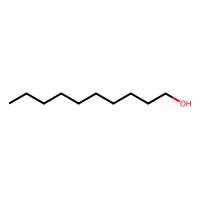
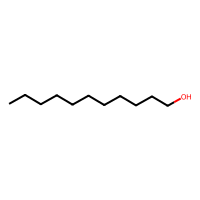
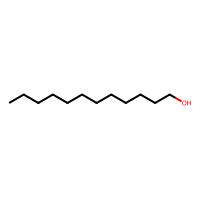
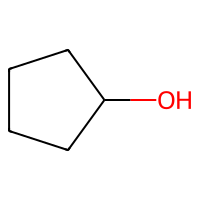
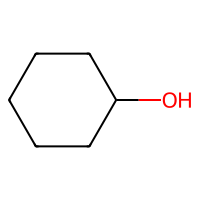
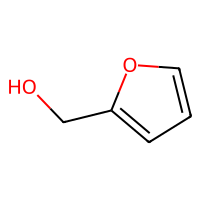
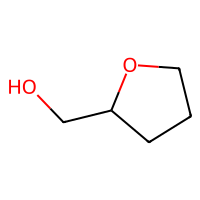
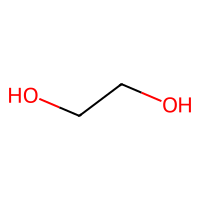
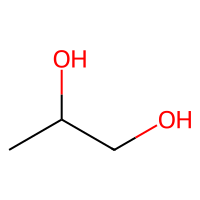
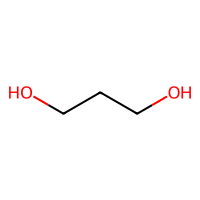
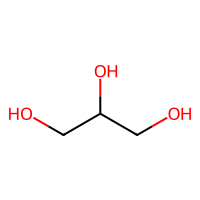
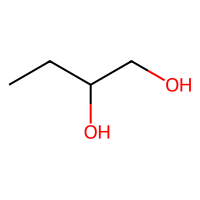
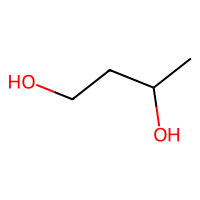
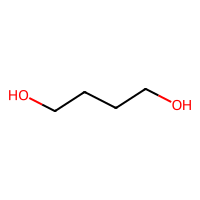
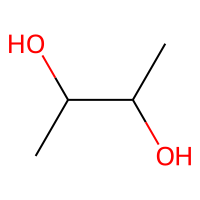
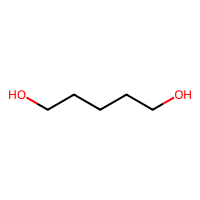
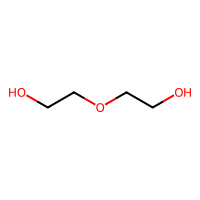
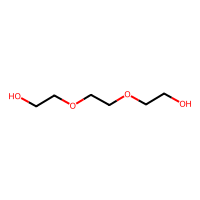
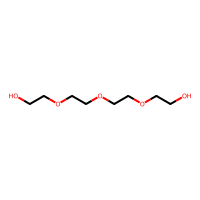
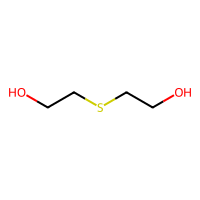
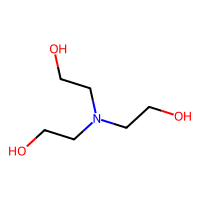
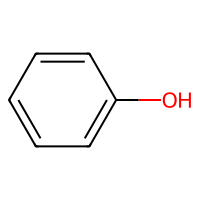
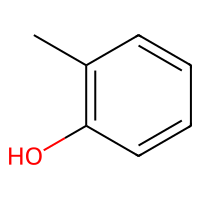
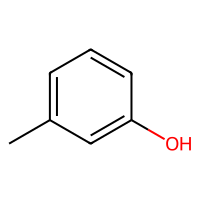
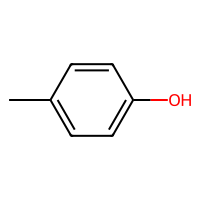
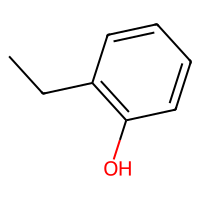
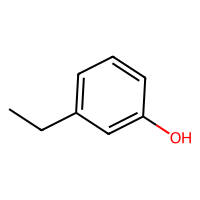
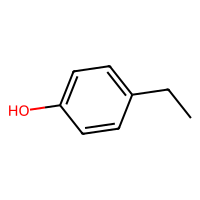
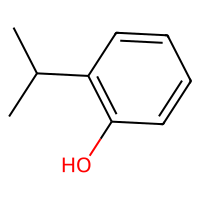
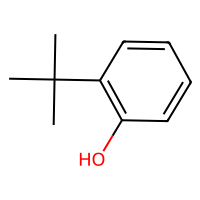
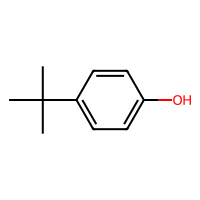
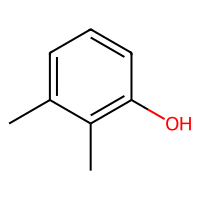
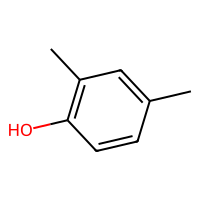
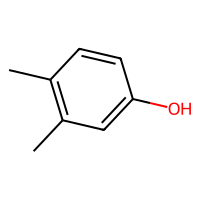
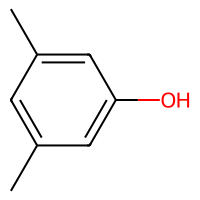
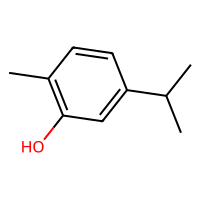
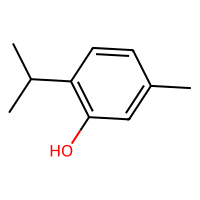
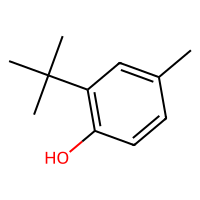
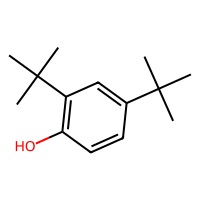
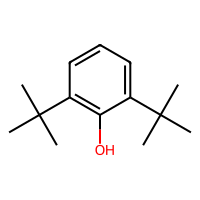
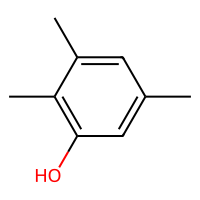
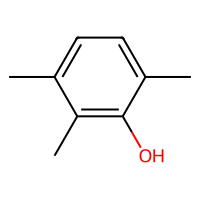
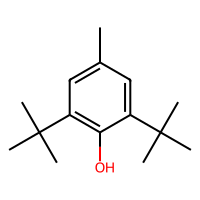
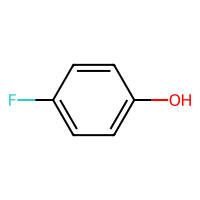
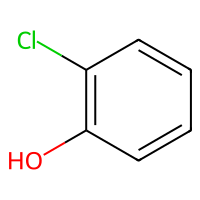
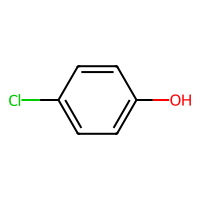
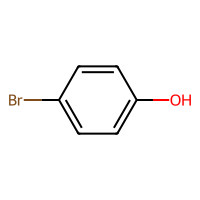
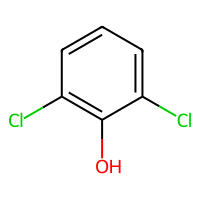
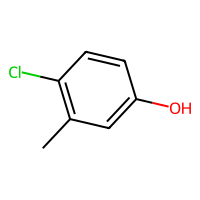
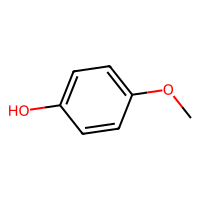
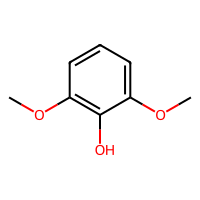
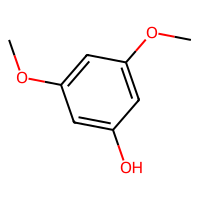
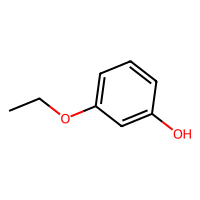
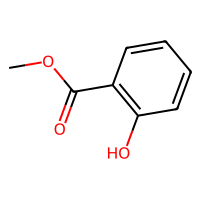
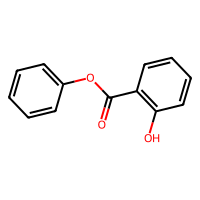

In [23]:
df